To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [1]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *
import pickle

In [11]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '\\' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '\\' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '\\' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city as Sioux Falls

In [19]:
#data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
data_path = "C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\"
cities = ['EMA']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [20]:
#classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/' + cities[0] + '/' + 'pytrans_working_multiple_eq_flow'
classes_path = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\Code\Python\working_multiple_eq_flow\EMA\pytrans_working_multiple_eq_flow'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
#import visualize_graph
import custom_class

# Make dict

In [21]:
cities_dict = make_dict(cities)
cities_dict

{'EMA': {'file_paths': {'link_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\EMA\\EMA_net.tntp.txt',
   'node_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\EMA\\EMA_nodes.tntp.txt',
   'trip_file_path': 'C:\\Users\\35387\\OneDrive\\Documents\\Networks\\New folder\\Networks_Term_Paper\\Data\\EMA\\EMA_trips.tntp.txt'}}}

# instantiate class

In [22]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe Sioux Falls

In [23]:
#set city for investigation
city = cities[0]

In [24]:
trial_run.create_links_csv()
cities_dict[city]['csv'].head(50)

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,3,4938.061313,16.106817,0.238965,0.15,4,0.0,0.0,0
1,3,1,5254.128510,16.057131,0.240297,0.15,4,0.0,0.0,0
2,1,7,7309.824721,16.058740,0.222813,0.15,4,0.0,0.0,0
3,7,1,7388.626964,15.865263,0.218902,0.15,4,0.0,0.0,0
4,1,9,1164.374840,17.455401,0.402046,0.15,4,0.0,0.0,0
5,9,1,1076.221509,17.450099,0.403219,0.15,4,0.0,0.0,0
6,2,3,885.069883,3.874725,0.106992,0.15,4,0.0,0.0,0
7,3,2,879.337660,3.975121,0.108032,0.15,4,0.0,0.0,0
8,3,6,5963.515309,7.587822,0.109499,0.15,4,0.0,0.0,0
9,6,3,6000.000000,7.447450,0.107665,0.15,4,0.0,0.0,0


# Plot graph

Total number of nodes in EMA: 74
Total number of edges in EMA: 258
Graph for: EMA


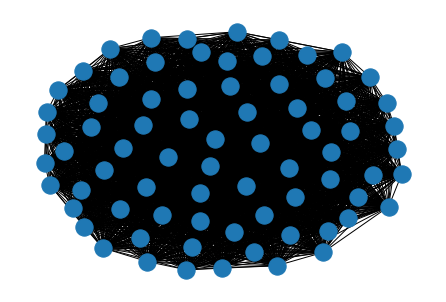

In [25]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [26]:
#observe network with all links
remove_link = None 
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

No links removed
EMA graph is: DiGraph with 74 nodes and 258 edges
EMA origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74']
EMA flows are: {('1', '1'): 0.0, ('1', '2'): 63.802849, ('1', '3'): 471.81948, ('1', '4'): 0.0, ('1', '5'): 0.0, ('1', '6'): 0.0, ('1', '7'): 918.488499, ('1', '8'): 0.0, ('1', '9'): 0.0, ('1', '10'): 0.0, ('1', '11'): 0.0, ('1', '12'): 0.0, ('1', '13'): 0.0, ('1', '14'): 0.0, ('1', '15'): 0.0, ('1', '16'): 0.0, ('1', '17'): 0.0, ('1', '18'): 0.0, ('1', '19'): 0.0, ('1', '20'): 0.0, ('1', '21'): 28.772957, ('1', '22'): 31.681824, ('1', '23'): 0.0, ('1', '24'): 0.0, ('1',

In [39]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

EMA graph is: DiGraph with 74 nodes and 257 edges
EMA origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74']
EMA flows are: {('1', '1'): 0.0, ('1', '2'): 63.802849, ('1', '3'): 471.81948, ('1', '4'): 0.0, ('1', '5'): 0.0, ('1', '6'): 0.0, ('1', '7'): 918.488499, ('1', '8'): 0.0, ('1', '9'): 0.0, ('1', '10'): 0.0, ('1', '11'): 0.0, ('1', '12'): 0.0, ('1', '13'): 0.0, ('1', '14'): 0.0, ('1', '15'): 0.0, ('1', '16'): 0.0, ('1', '17'): 0.0, ('1', '18'): 0.0, ('1', '19'): 0.0, ('1', '20'): 0.0, ('1', '21'): 28.772957, ('1', '22'): 31.681824, ('1', '23'): 0.0, ('1', '24'): 0.0, ('1', '25'): 0.0, ('1'

# Compute equilibrium flow for complete graph of Sioux Falls using Frank-Wolfe algorithm

In [40]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = 1
trial_run.compute_link_flow(city, remove_link)

CPU times: total: 9min 36s
Wall time: 9min 43s


In [41]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
#trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

Results for: EMA
1  ->  3 :  570.3491484330887
1  ->  7 :  918.488499
1  ->  9 :  278.2361029615022
3  ->  2 :  1171.740411
3  ->  6 :  856.1889197073668
3  ->  7 :  455.59390452798823
7  ->  1 :  837.0194495082866
7  ->  3 :  296.6170670487568
7  ->  9 :  134.776233
7  ->  13 :  208.56714133113113
9  ->  1 :  193.74992088630262
9  ->  7 :  123.04088760541129
9  ->  12 :  422.756
9  ->  13 :  570.8066889615023
2  ->  3 :  1193.292299
6  ->  3 :  1611.15452275351
6  ->  4 :  0.0
6  ->  8 :  1756.1438817878231
6  ->  13 :  577.7753130194612
6  ->  17 :  1080.626328656921
4  ->  6 :  0.0
4  ->  8 :  0.0
8  ->  4 :  0.0
8  ->  6 :  1150.885700921696
8  ->  11 :  1756.1438817494825
8  ->  16 :  8.73481213920373e-07
5  ->  10 :  0.0
5  ->  11 :  0.0
10  ->  5 :  0.0
10  ->  11 :  1150.8857014738323
10  ->  18 :  444.5373136300305
10  ->  20 :  358.87879728039735
11  ->  5 :  0.0
11  ->  8 :  1150.885700921696
11  ->  10 :  2279.550322784355
11  ->  19 :  5.521372715998242e-07
13  ->  6 :  32

In [ ]:
#observe network after removing one link
remove_link = 2
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

#compute the eq flow for one example city and no closed links
remove_link = 2
trial_run.compute_link_flow(city, remove_link)

#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
#trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

EMA graph is: DiGraph with 74 nodes and 257 edges
EMA origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74']
EMA flows are: {('1', '1'): 0.0, ('1', '2'): 63.802849, ('1', '3'): 471.81948, ('1', '4'): 0.0, ('1', '5'): 0.0, ('1', '6'): 0.0, ('1', '7'): 918.488499, ('1', '8'): 0.0, ('1', '9'): 0.0, ('1', '10'): 0.0, ('1', '11'): 0.0, ('1', '12'): 0.0, ('1', '13'): 0.0, ('1', '14'): 0.0, ('1', '15'): 0.0, ('1', '16'): 0.0, ('1', '17'): 0.0, ('1', '18'): 0.0, ('1', '19'): 0.0, ('1', '20'): 0.0, ('1', '21'): 28.772957, ('1', '22'): 31.681824, ('1', '23'): 0.0, ('1', '24'): 0.0, ('1', '25'): 0.0, ('1'

# Systematically close each link and compute equilibrium flow for Sioux Falls

In [30]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
check = list(cities_dict[city].keys())
check.remove('file_paths')
check.remove('csv')
print(check)
for i in check:
    if cities_dict[city]['csv'].shape[0] <= len(cities_dict[city][i]['network'].graph.edges):
        print(True)
    #should only print one True i.e. only one full network - 'None'

In [ ]:
%%time
#run
trial_run.eq_flow_shut_each_link(city)

In [ ]:
#edge 6 doesn't run 

In [ ]:
#check it has computed eq flow for each closed link
for i in check: 
    print(cities_dict[city][i]['fw_run'])

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

# Save file

In [ ]:
save_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/pickles'
SiouxFalls_dict = cities_dict
with open('EMA.pickle', 'wb') as handle:
    pickle.dump(SiouxFalls_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)